# Basis vector matrix generation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## basis chip (u,v) = (3,4)

In [3]:
def basis_chip(P,Q,u,v):
    x = np.arange(1,P+1)
    y = np.arange(1,Q+1)
    
    X,Y = np.meshgrid(x,y)
    
    # normalizing vector
    alpha_u = np.sqrt(1/P) if u==1 else np.sqrt(2/P)
    beta_v = np.sqrt(1/Q) if v==1 else np.sqrt(2/Q)
    
    chip = alpha_u*beta_v*np.cos((np.pi*((2*X)-1)*(u-1))/(2*P))*np.cos((np.pi*((2*Y)-1)*(v-1))/(2*Q))
    
    return chip
    
    

In [4]:
chip = basis_chip(8,8,3,4)

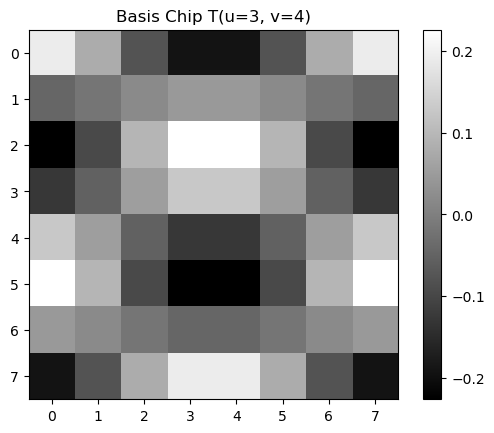

In [5]:
plt.imshow(chip, cmap='gray')
plt.colorbar()
plt.title(f"Basis Chip T(u={3}, v={4})")
plt.show()

## basis chip (u,v) = (5,2)

In [6]:
chip = basis_chip(8,8,5,2)

In [7]:
chip.shape

(8, 8)

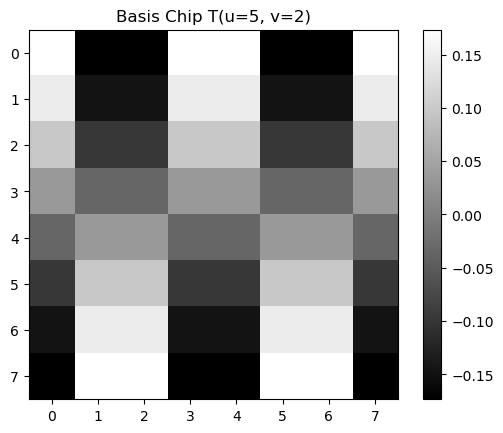

In [8]:
plt.imshow(chip,cmap='gray')
plt.colorbar()
plt.title(f"Basis Chip T(u={5}, v={2})")
plt.show()

## Basis vector matrix generation

In [9]:
a=np.arange(1,7).reshape((2,3))
a.flatten()

array([1, 2, 3, 4, 5, 6])

In [10]:
a.flatten(order='F')

array([1, 4, 2, 5, 3, 6])

In [11]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
def basis_vector_matrix(P,Q,uv_orientation=False):
    basis_vector = np.zeros((P**2,1))
    
    if not uv_orientation:
        for vx in range(1,Q+1):
            for uy in range(1,P+1):
                chip = basis_chip(P,Q,uy,vx)
                rasterized_chip = chip.flatten(order='F')
                basis_vector = np.column_stack((basis_vector,rasterized_chip))
    else:
        for uy in range(1,Q+1):
            for vx in range(1,P+1):
                chip = basis_chip(P,Q,uy,vx)
                rasterized_chip = chip.flatten(order='F')
                basis_vector = np.column_stack((basis_vector,rasterized_chip))
    
    basis_vector = basis_vector[:,1:]
    
    return basis_vector
            
            

In [13]:
bas_vu = basis_vector_matrix(8,8)
np.save("../assets/basis vector matrix-vu.npy", bas_vu)
bas_uv = basis_vector_matrix(8,8, True)
np.save("../assets/basis vector matrix-uv.npy", bas_uv)

In [14]:
fig = plt.figure(frameon=False)
plt.imshow(bas_vu, cmap='gray')
plt.axis('off')
plt.savefig('../assets/basis vector matrix-vu.png', bbox_inches='tight', pad_inches=0)
plt.close()

fig = plt.figure(frameon=False)
plt.imshow(bas_uv, cmap='gray')
plt.axis('off')
plt.savefig('../assets/basis vector matrix-uv.png', bbox_inches='tight', pad_inches=0)
plt.close()

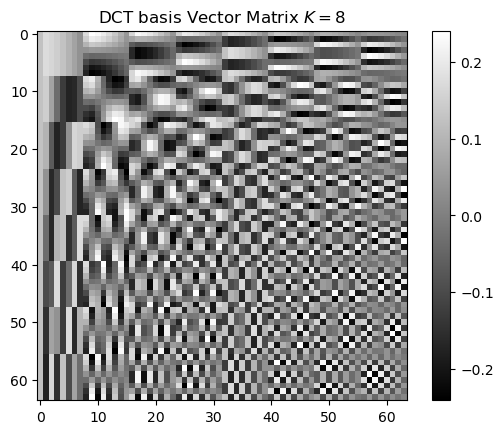

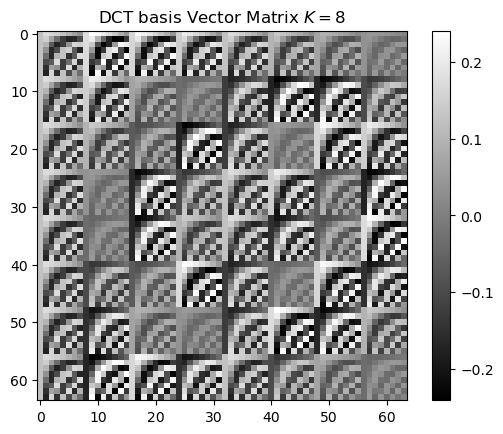

In [15]:
plt.imshow(bas_vu, cmap='gray')
plt.colorbar()
plt.title(f"DCT basis Vector Matrix $K=8$")
plt.show()

plt.imshow(bas_uv, cmap='gray')
plt.colorbar()
plt.title(f"DCT basis Vector Matrix $K=8$")
plt.show()

## Packagization of the basis vector matrix

In [19]:
import numpy as np

class BasisGenerator:
    """A class for generating basis chips and basis vector matrix for image reconstruction.
    
    This class provides functionality to:
    1. Generate basis chips with specified dimensions
    2. Create basis vector matrix for LASSO reconstruction
    3. Support both UV and XY orientations
    
    Attributes:
        P (int): Height of the basis chips
        Q (int): Width of the basis chips
        uv_orientation (bool): Whether to use UV orientation (True) or XY orientation (False)
    """
    
    def __init__(self, P, Q, uv_orientation=True):
        """Initialize the BasisGenerator instance.
        
        Args:
            P (int): Height of the basis chips
            Q (int): Width of the basis chips
            uv_orientation (bool, optional): Use UV orientation if True, XY if False. Defaults to True.
        """
        self.P = P
        self.Q = Q
        self.uv_orientation = uv_orientation
        
    def generate_basis_chip(self, u, v):
        """Generate a single basis chip.
        
        Args:
            u (int): Frequency component in u direction
            v (int): Frequency component in v direction
            
        Returns:
            numpy.ndarray: Generated basis chip of shape (P, Q)
        """
        x = np.arange(self.P)
        y = np.arange(self.Q)
        X, Y = np.meshgrid(x, y, indexing='ij')
        
        if self.uv_orientation:
            return np.cos(np.pi * u * X / (self.P - 1)) * np.cos(np.pi * v * Y / (self.Q - 1))
        else:
            return np.cos(np.pi * X * u / (self.P - 1) + np.pi * Y * v / (self.Q - 1))
    
    def generate_basis_matrix(self):
        """Generate the complete basis vector matrix.
        
        Returns:
            numpy.ndarray: Basis vector matrix of shape (P*Q, P*Q)
        """
        basis_vector = np.zeros((P**2,1))
    
        if not self.uv_orientation:
            for vx in range(1,self.Q+1):
                for uy in range(1,self.P+1):
                    chip = basis_chip(self.P,self.Q,uy,vx)
                    rasterized_chip = chip.flatten(order='F')
                    basis_vector = np.column_stack((basis_vector,rasterized_chip))
        else:
            for uy in range(1,self.Q+1):
                for vx in range(1,self.P+1):
                    chip = basis_chip(self.P,self.Q,uy,vx)
                    rasterized_chip = chip.flatten(order='F')
                    basis_vector = np.column_stack((basis_vector,rasterized_chip))
        
        basis_vector = basis_vector[:,1:]
        return basis_vector
    
    def get_basis_chip(self, index):
        """Get a specific basis chip by its index.
        
        Args:
            index (int): Index of the basis chip
            
        Returns:
            numpy.ndarray: Basis chip of shape (P, Q)
        """
        u = index // self.Q
        v = index % self.Q
        return self.generate_basis_chip(u, v)

Text(0.5, 1.0, 'DCT Basis Matrix ($P=8, Q=8$)')

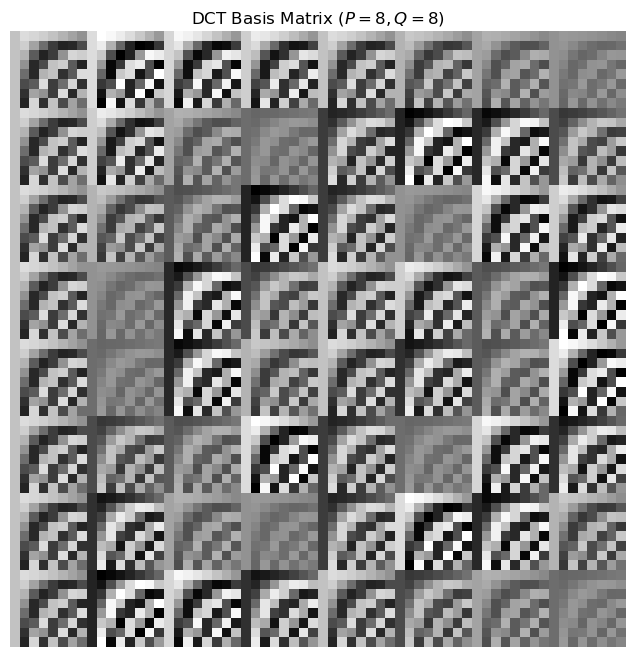

In [21]:
# Example usage
P, Q = 8, 8  # Block dimensions
generator = BasisGenerator(P, Q, uv_orientation=True)

# Generate complete basis matrix
basis_matrix = generator.generate_basis_matrix()

# plot the basis matrix
plt.figure(figsize=(8, 8))
plt.imshow(basis_matrix, cmap='gray')
plt.axis('off')
plt.title(f"DCT Basis Matrix ($P={P}, Q={Q}$)")
